In [7]:
# Step 1: Assign Scores Based on Ranking
# input variables: song rankings, and name of the artists
from extract_data import generate


scores_by_artist = {}
artists = generate()


for i in range(100):
    score = 101 - i  # Calculate the score based on ranking
    artist = artists[i]
    if artist in scores_by_artist:
        scores_by_artist[artist] += score
    else:
        scores_by_artist[artist] = score


# Step 2 & 3: Sort Artists by Total Score
sorted_artists = sorted(
    scores_by_artist.items(), key=lambda x: x[1], reverse=True
)


# Step 4: Select the Top 5 Artists
top_5_artists = sorted_artists[:5]


# Print the top 5 artists
print(top_5_artists)
for rank, (artist, score) in enumerate(top_5_artists, start=1):
    print(f"{rank}. {artist} - Total Score: {score}")




(['Thrift Shop', 'Blurred Lines', 'Radioactive', 'Harlem Shake', 'Cant Hold Us', 'Mirrors', 'Just Give Me a Reason', 'When I Was Your Man', 'Cruise', 'Roar', 'Locked Out of Heaven', 'Ho Hey', 'Stay', 'Get Lucky', 'Royals', 'I Knew You Were Trouble', 'We Cant Stop', 'Wrecking Ball', 'Wake Me Up', 'Suit and Tie', 'Cups Pitch Perfects When Im Gone', 'Holy Grail', 'Scream and Shout', 'Clarity', 'Sail', 'Dont You Worry Child', 'Diamonds', 'I Love It', 'Safe and Sound', 'Treasure', 'The Way', 'Started from the Bottom', 'Come and Get It', 'Hold On Were Going Home', 'Daylight', 'Feel This Moment', 'Applause', 'One More Night', 'Love Me', 'My Songs Know What You Did in the Dark Light Em Up', 'Fuckin Problems', 'Beauty and a Beat', 'Same Love', 'Sweet Nothing', 'Summertime Sadness', 'Home', 'Its Time', 'Power Trip', 'Girl on Fire', 'Heart Attack', 'Love Somebody', 'I Will Wait', 'Try', 'Wagon Wheel', 'Gangnam Style', 'I Need Your Love', 'Die Young', 'Some Nights', 'Bad', 'Boys Round Here', 'Gone

TypeError: unhashable type: 'list'

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.4767}
{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.5994}
{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound': 0.5859}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


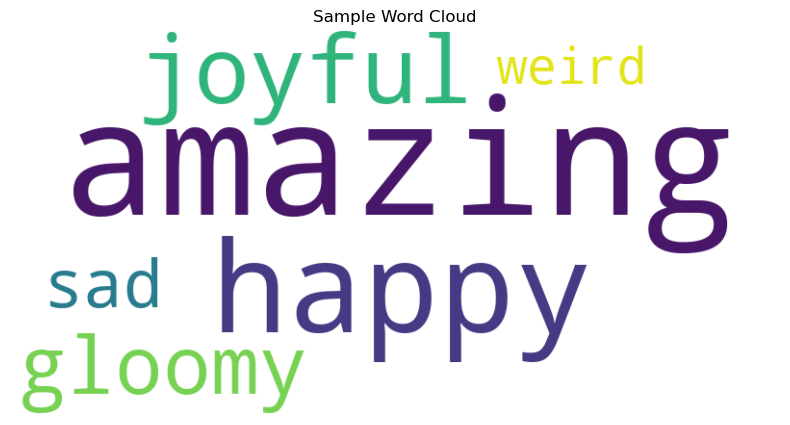

In [ ]:
import nltk

nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

words = ["Im", "Blue", "Dabadee", "You", "Sad", "Die", "Amazing", "Dog"]
for word in words:
    print(analyzer.polarity_scores(word))

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Sample dictionary of word frequencies
word_frequencies = {
    'happy': 23,
    'joyful': 17,
    'sad': 8,
    'gloomy': 12,
    'weird' : 4,
    'amazing' : 40
    # Add more words and their frequencies
}

def generate_word_cloud_from_frequencies(frequencies, title):
    wordcloud = WordCloud(width=800, height=400, background_color ='white').generate_from_frequencies(frequencies)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generate the word cloud
generate_word_cloud_from_frequencies(word_frequencies, "Sample Word Cloud")



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


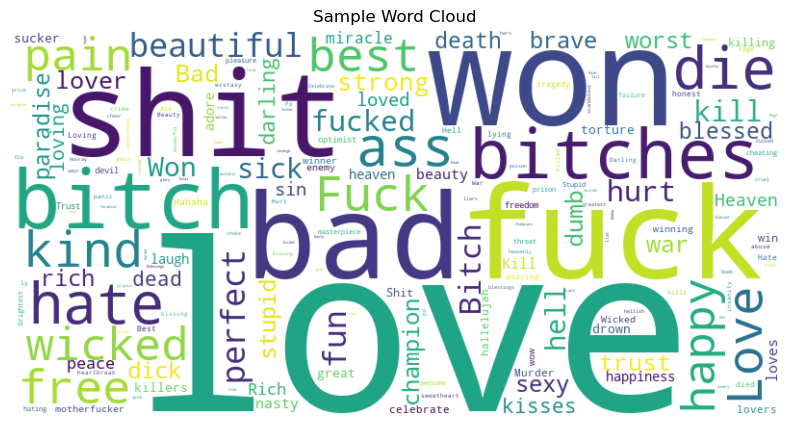

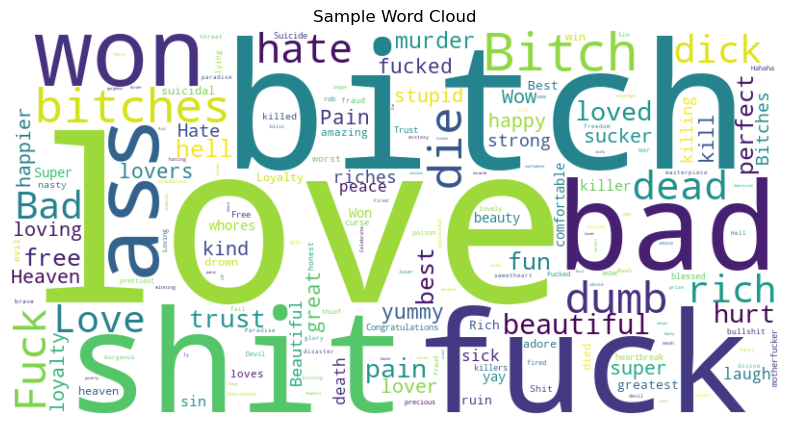

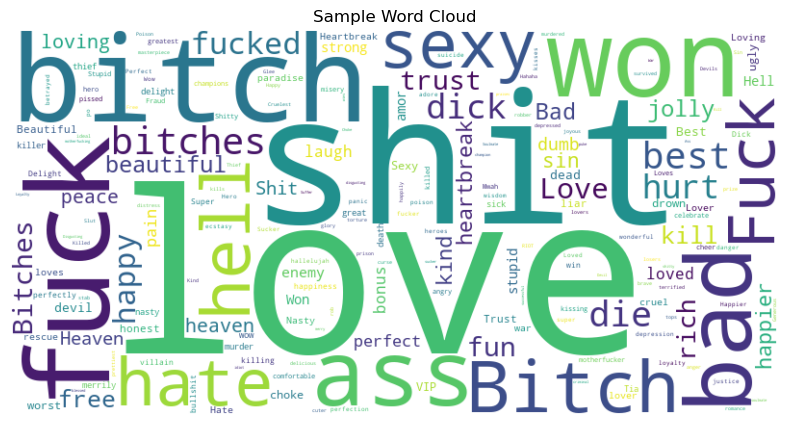

In [40]:
import nltk
import csv
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt


nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()


def polarity(word):
    return analyzer.polarity_scores(word)


def split_text_into_words(text):
    # Split the text into words based on various non-word characters
    words = re.split(r"\W+", text)
    # Filter out empty strings
    words_list = [word for word in words if word]
    return words_list


csv_file_path = "billboard_data_with_lyrics.csv"


with open(csv_file_path, newline="") as csvfile:
    csvreader = csv.reader(csvfile)


    words_dictionary = {}
    words_dictionary1 = {}
    words_dictionary2 = {}
    list_of_dictionary = [
        words_dictionary,
        words_dictionary1,
        words_dictionary2,
    ]

    for count, row in enumerate(csvreader, start=0):
        # Process each row here
        # For example, you can print it

        # apparently "row" is a list? Coz its a data frame so its a list. I didnt kno that lol 
    
        words = split_text_into_words(row[4])
        for word in words:
            if abs(polarity(word)['compound']) > 0.5:
                
                # Choose the correct dictionary based on the count
                current_dict = list_of_dictionary[count // 400]
                # Use get to avoid KeyError, defaulting to 0 if the key doesn't exist
                current_dict[word] = current_dict.get(word, 0) + 1
            

def generate_word_cloud_from_frequencies(frequencies, title):
    wordcloud = WordCloud(
        width=800, height=400, background_color="white"
    ).generate_from_frequencies(frequencies)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(title)
    plt.show()


# Generate the word cloud
year = 2013 
for i in range(3):

    generate_word_cloud_from_frequencies(
        list_of_dictionary[i], f"Word Cloud From Year {year} to {year + 3 - (i == 2)} "
    )


In [38]:

import nltk

nltk.download("vader_lexicon")

from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()
word = "no"
print(analyzer.polarity_scores(word))


{'neg': 1.0, 'neu': 0.0, 'pos': 0.0, 'compound': -0.296}


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [15]:
import re

def split_text_into_words(text):
    # Split the text into words based on various non-word characters
    words = re.split(r'\W+', text)
    # Filter out empty strings
    words_list = [word for word in words if word]
    return words_list

# Example usage with your provided text snippet
text = "Hey, Macklemore, can we go thrift shopping? lol-lol-lol I am so, confused!!! lol   lmao"
words = split_text_into_words(text)
print(words)


['Hey', 'Macklemore', 'can', 'we', 'go', 'thrift', 'shopping', 'lol', 'lol', 'lol', 'I', 'am', 'so', 'confused', 'lol', 'lmao']
